<div style="max-width:66ch;">

# Scikit-learn exercises 

These are introductory exercises in Machine learning with focus in **scikit-learn** and **linear regression**.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

</div>

<div style="max-width:66ch;">

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop.

</div>


In [34]:
#0a)

import seaborn as sns 

mpg_data = sns.load_dataset("mpg")

print(mpg_data.head())
print(mpg_data.info())

#0b)
mpg_data[["mpg", "weight", "horsepower"]].describe()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

,mpg,weight,horsepower
count,398.000000,398.000000,392.000000
mean,23.514573,2970.424623,104.469388
std,7.815984,846.841774,38.491160
min,9.000000,1613.000000,46.000000
25%,17.500000,2223.750000,75.000000
50%,23.000000,2803.500000,93.500000
75%,29.000000,3608.000000,126.000000
max,46.600000,5140.000000,230.000000


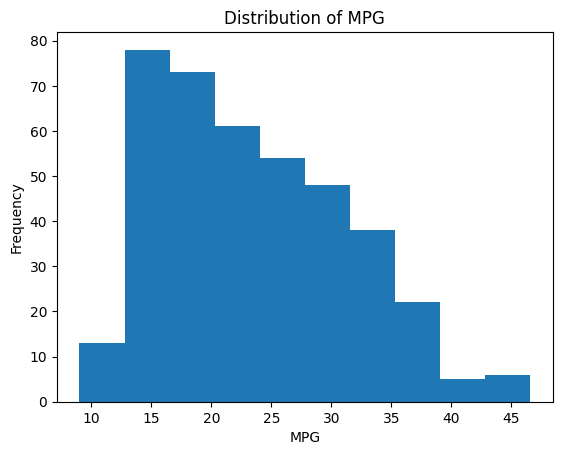

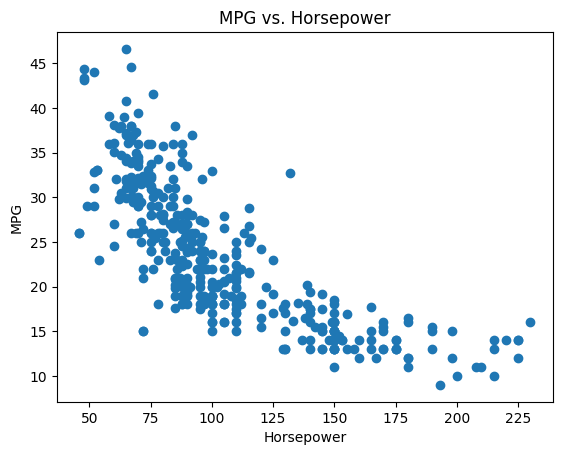

In [35]:
#0c)

import matplotlib.pyplot as plt

plt.hist(mpg_data["mpg"])
plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.title("Distribution of MPG")
plt.show()

plt.scatter(mpg_data["horsepower"], mpg_data["mpg"])  
plt.xlabel("Horsepower")  
plt.ylabel("MPG")
plt.title("MPG vs. Horsepower")  
plt.show()


In [40]:
#0d) some GPT learning

import seaborn as sns

# Load the dataset
mpg_data = sns.load_dataset('mpg')

# Dropping the 'name' column as it's likely not useful for regression without text processing
mpg_data = mpg_data.drop('name', axis=1)

# Dropping the 'origin' column to simplify the dataset, assuming we won't one-hot encode in this example
mpg_data = mpg_data.drop('origin', axis=1)

# Optionally, dropping 'displacement' to reduce multicollinearity and simplify the model
# This step might be skipped or modified based on the teaching goals
mpg_data = mpg_data.drop('displacement', axis=1)

# Display the modified DataFrame
print(mpg_data.head())


    mpg  cylinders  horsepower  weight  acceleration  model_year
0  18.0          8       130.0    3504          12.0          70
1  15.0          8       165.0    3693          11.5          70
2  18.0          8       150.0    3436          11.0          70
3  16.0          8       150.0    3433          12.0          70
4  17.0          8       140.0    3449          10.5          70


<div style="max-width:66ch;">

---

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

</div>


In [42]:
from sklearn.model_selection import train_test_split


X = mpg_data.drop("mpg", axis=1)  
y = mpg_data["mpg"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (318, 5)
X_test shape: (80, 5)
y_train shape: (318,)
y_test shape: (80,)


<div style="max-width:66ch;">

---

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

</div>


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'mpg_data' is your cleaned DataFrame without the 'name' and 'origin' columns
X = mpg_data.drop(columns=['mpg'], axis=1)
y = mpg_data['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with NaN values from the training and testing sets
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Function to train the model, predict, and compute metrics
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    # Calculate and print the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

# Initialize a Linear Regression model
model = LinearRegression()

# Evaluate the model
evaluate_model(X_train, X_test, y_train, y_test, model)


Mean Absolute Error (MAE): 2.4742871620071054
Mean Squared Error (MSE): 9.501255565496335
Root Mean Squared Error (RMSE): 3.0824106743742528


<div style="max-width:66ch;">

---

## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

---
</div>



In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
import seaborn as sns

# Load and clean the data
mpg_data = sns.load_dataset('mpg')
mpg_data_cleaned = mpg_data.dropna()

# Splitting the features and target variable
X = mpg_data_cleaned.drop('mpg', axis=1).select_dtypes(include=[np.number])  # Only numeric features
y = mpg_data_cleaned['mpg']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Models
models = {
    "Linear Regression (SVD)": LinearRegression(),
    "Linear Regression (SVD) - Scaled": make_pipeline(StandardScaler(), LinearRegression()),
    "SGD - Scaled": make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)),
}

# Polynomial degrees
for degree in [1, 2, 3]:
    models[f"Polynomial Degree {degree}"] = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False), LinearRegression())

# Evaluate models and store results
results = []

for name, model in models.items():
    mae, mse, rmse = train_evaluate(model, X_train, X_test, y_train, y_test)
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse})

# Create DataFrame to display results
results_df = pd.DataFrame(results)

# Display results
print(results_df.sort_values(by="RMSE"))

# Identify the best model based on RMSE
best_model_info = results_df.loc[results_df['RMSE'].idxmin()]
print("\nBest Model:", best_model_info['Model'])


                              Model       MAE        MSE      RMSE
4               Polynomial Degree 2  1.980477   7.419858  2.723942
5               Polynomial Degree 3  2.117882   9.273542  3.045249
1  Linear Regression (SVD) - Scaled  2.503860  10.502370  3.240736
0           Linear Regression (SVD)  2.503860  10.502370  3.240736
3               Polynomial Degree 1  2.503860  10.502370  3.240736
2                      SGD - Scaled  2.524501  10.869267  3.296857

Best Model: Polynomial Degree 2


<div style="max-width:66ch;">


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

---

</div>


<div style="width: 66ch;">


</div>

<div style="background-color: #FFF; color: #212121; border-radius: 20px; width:25ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1em; width: 60%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
    <div>
</div>